In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt 
import seaborn as sns 
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten , Dropout , BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix 
from keras.callbacks import ReduceLROnPlateau

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


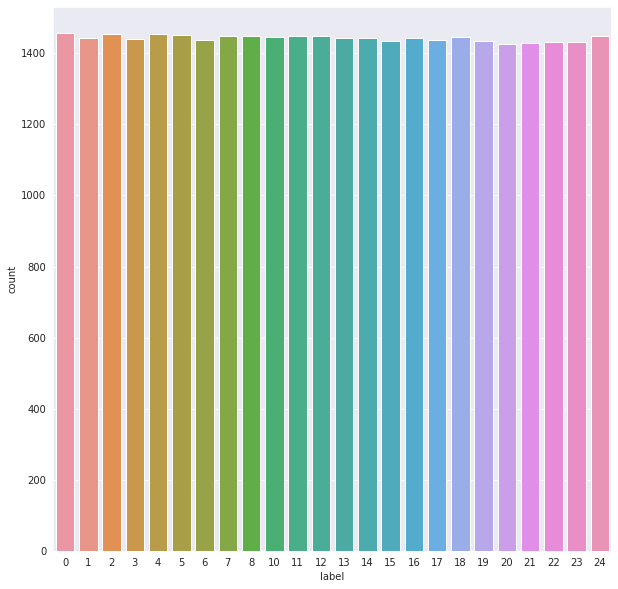

In [5]:
df = pd.read_csv("./sign_mnist.csv")
# input_test_df = pd.read_csv("../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")
# df = pd.concat([input_train_df, input_test_df], axis=0)

plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(df['label'])

# New Section

first row:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

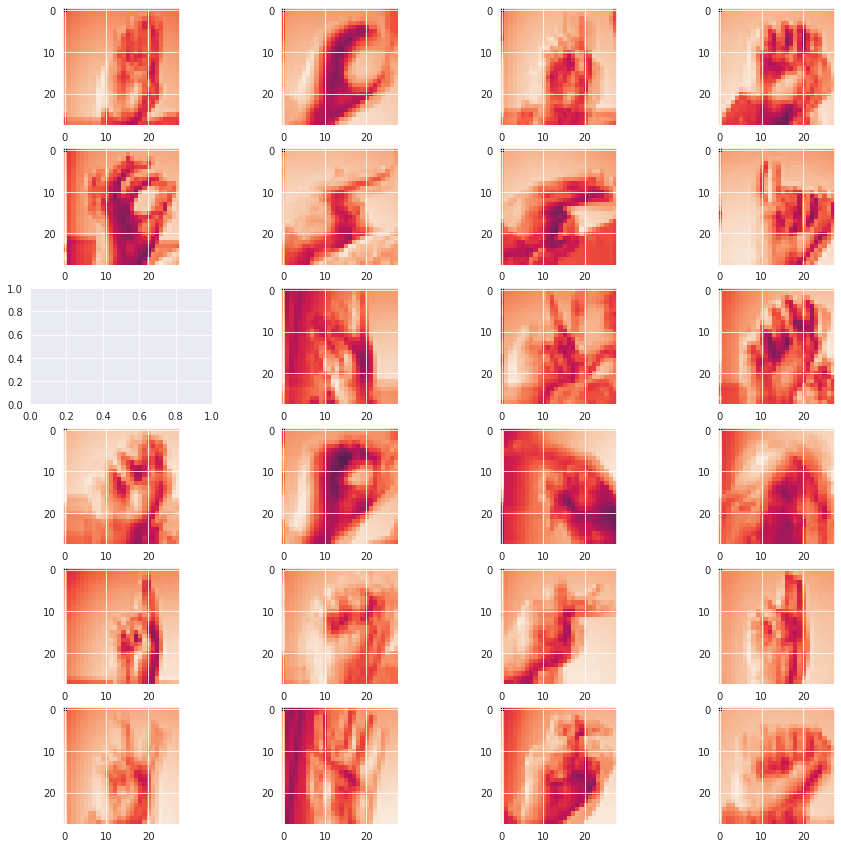

In [7]:
y = df['label']
# del df['label']

# from sklearn. preprocessing import LabelBinarizer
# label_binarizer = LabelBinarizer ()
# y= label_binarizer.fit_transform(y)
x = df.values
# x = x / 255
# x = x.reshape(-1,28,28,1)

y = df['label']
x = df.values

sizeOfImg = 784
totalLetters = 24
heatmaps = [[0 for pixel in range(sizeOfImg)] for letter in range(totalLetters)] #[[0]*sizeOfImg]*totalLetters

lableCount = [0]*totalLetters


for k in range(100):
#     print (len (df.loc[[k]]))
    row = (df.loc[[k]].values.flatten().tolist())
#     print (len(row))
#     print (row)
    label = row[0] - 1
#     print (label)
    lableCount[label] += 1
    print("first row:")
    print(heatmaps[0])
    print("first row:")
    print("|")
    for i in range(1,sizeOfImg):
#         print(row[i])
#         if row[i] > 127:    
        heatmaps[label][i] = heatmaps[label][i] + row[i]
    print(label, heatmaps[label])

for k in range(len(lableCount)):
    print(k, " = " ,lableCount[k], " images")
    if (lableCount[k] != 0):
        label = k
        for i in range(sizeOfImg):
            heatmaps[k][i] = heatmaps[k][i] / lableCount[label]



figureHM, axisHM = plt.subplots(nrows=6, ncols=4, figsize=(15,15),)

import cv2

k = 0
for rowsHM in range(6):
    for columnsHM in range(4):
        if (lableCount[k] != 0):
            imgHM = np.reshape(heatmaps[k], (28,28))
#             HM = cv2.applyColorMap(imgHM.astype(np.uint8),cv2.COLORMAP_HOT)
#             print(k , imgHM)
            axisHM[rowsHM][columnsHM].imshow(imgHM)
        k+=1

# New Section

In [14]:
labels = df .label.unique()
labels

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [15]:
#getting all the letters
letter = data.drop_duplicates(subset = ["label"])
letter = letter.drop(columns = ["label"])



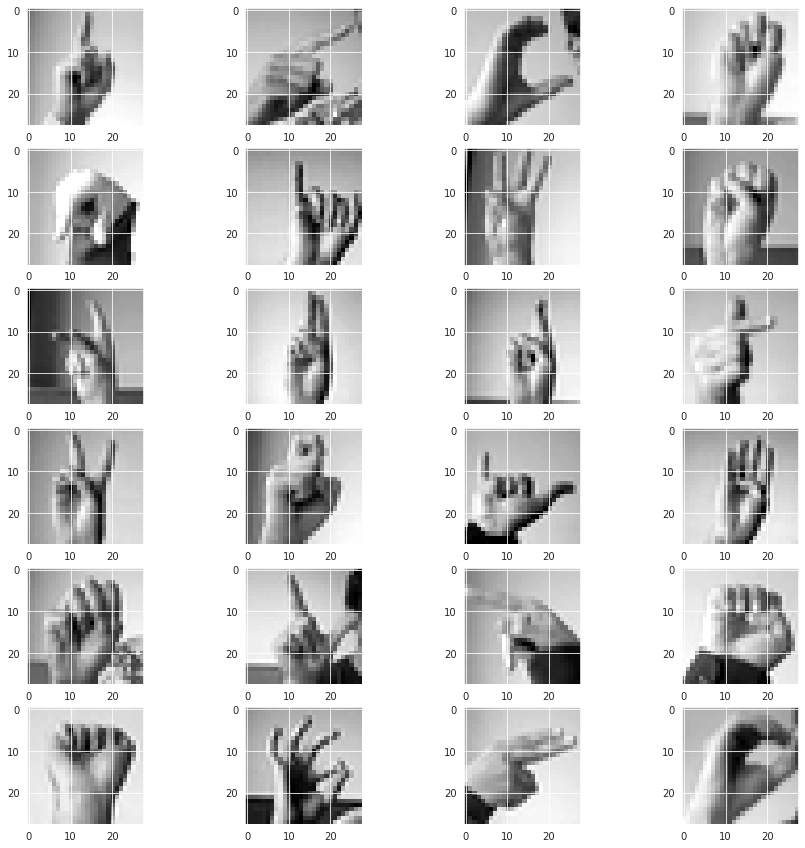

In [12]:
k = 0
figure, axis = plt.subplots(nrows=6, ncols=4, figsize=(15,15),)
for rows in range(6):
  for columns in range(4):
    img = letter.iloc[k].values.reshape(28,28)
    axis[rows][columns].imshow(img,cmap = "gray")
    k +=1
    


(24, 784)
(24, 784)


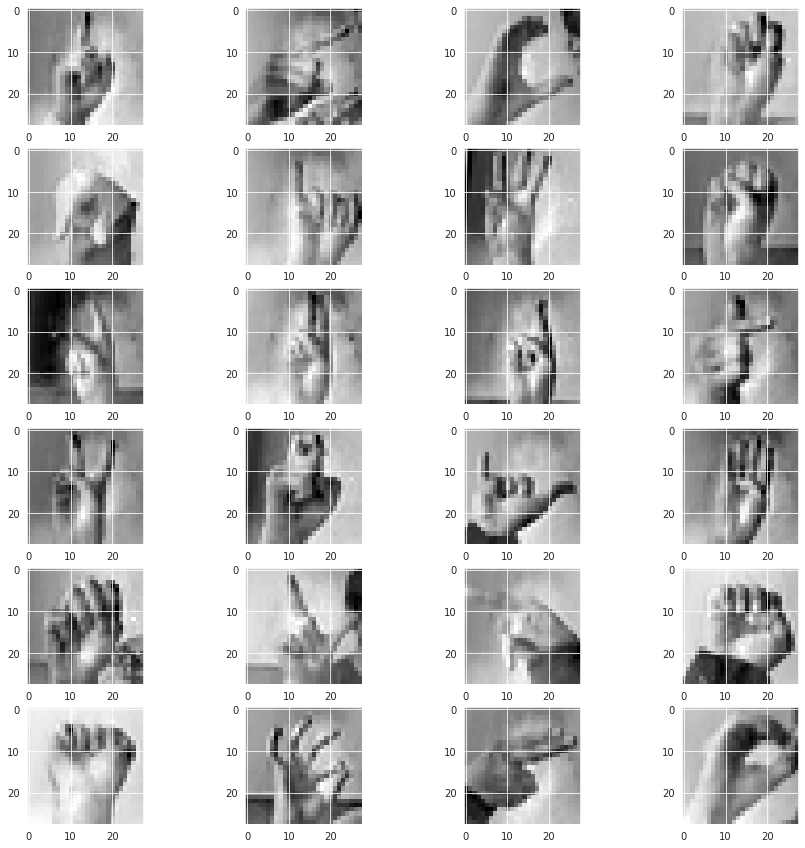

In [13]:
from sklearn import preprocessing

print(letter.shape)
letter = preprocessing.scale(letter)
print(letter.shape)
k = 0
figure, axis = plt.subplots(nrows=6, ncols=4, figsize=(15,15),)
for rows in range(6):
  for columns in range(4):
    img = letter[k].reshape(28,28)
    axis[rows][columns].imshow(img,cmap = "gray")
    k +=1